# Self-Driving Car Engineer Nanodegree

## Project: **Advanced Lane Finding on the Road** 
***

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


Above that, I might use tools below that I used previous project. I put it here to remember for my own sake.
* Color selection
* Region of interest selection
* Grayscaling
* Gaussian smoothing
* Canny Edge Detection and Hough Transform


## Goal Image
***
Now I got overview of this project, let's take a look training / expected output image first.


<figure>
 <img src="test_images/straight_lines1.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Original input image should look something like this (above) </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/example_output.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Goal is to implement pipeline to get output like this </p> 
 </figcaption>
</figure>



## Programming time!(≧∇≦)b
***

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

### Camera Calibration

First, I'll compute the camera calibration using chessboard images. I use given images, and extract object and image points. 

In [2]:
# Prepare object points, like (0, 0, 0), (1, 0, 0) .....(6, 5, 0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# list to store object and image points respectively.
# object points for 3d real world space, whreas image points for 2d
objpoints = []
imgpoints = []

# Get given chessboard images
# camera_cal/calibration*.jpg
images = glob.glob('./camera_cal/calibration*.jpg')
fx = 9
fy = 6

# Iterate throuch chessboard to get its corners
for f_name in images:
    print(f_name)
    img = cv2.imread(f_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the corners
    ret, corners = cv2.findChessboardCorners(gray, (fx, fy), None)

    print(ret)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        # img = cv2.drawChessboardCorners(img, (fx, fy), corners, ret)

        


./camera_cal/calibration1.jpg
False
./camera_cal/calibration10.jpg
True
./camera_cal/calibration11.jpg
True
./camera_cal/calibration12.jpg
True
./camera_cal/calibration13.jpg
True
./camera_cal/calibration14.jpg
True
./camera_cal/calibration15.jpg
True
./camera_cal/calibration16.jpg
True
./camera_cal/calibration17.jpg
True
./camera_cal/calibration18.jpg
True
./camera_cal/calibration19.jpg
True
./camera_cal/calibration2.jpg
True
./camera_cal/calibration20.jpg
True
./camera_cal/calibration3.jpg
True
./camera_cal/calibration4.jpg
False
./camera_cal/calibration5.jpg
False
./camera_cal/calibration6.jpg
True
./camera_cal/calibration7.jpg
True
./camera_cal/calibration8.jpg
True
./camera_cal/calibration9.jpg
True


Then I got object points and imagepoints, I calibrate, calculate distortion coefficients, and test undistortion on an image.

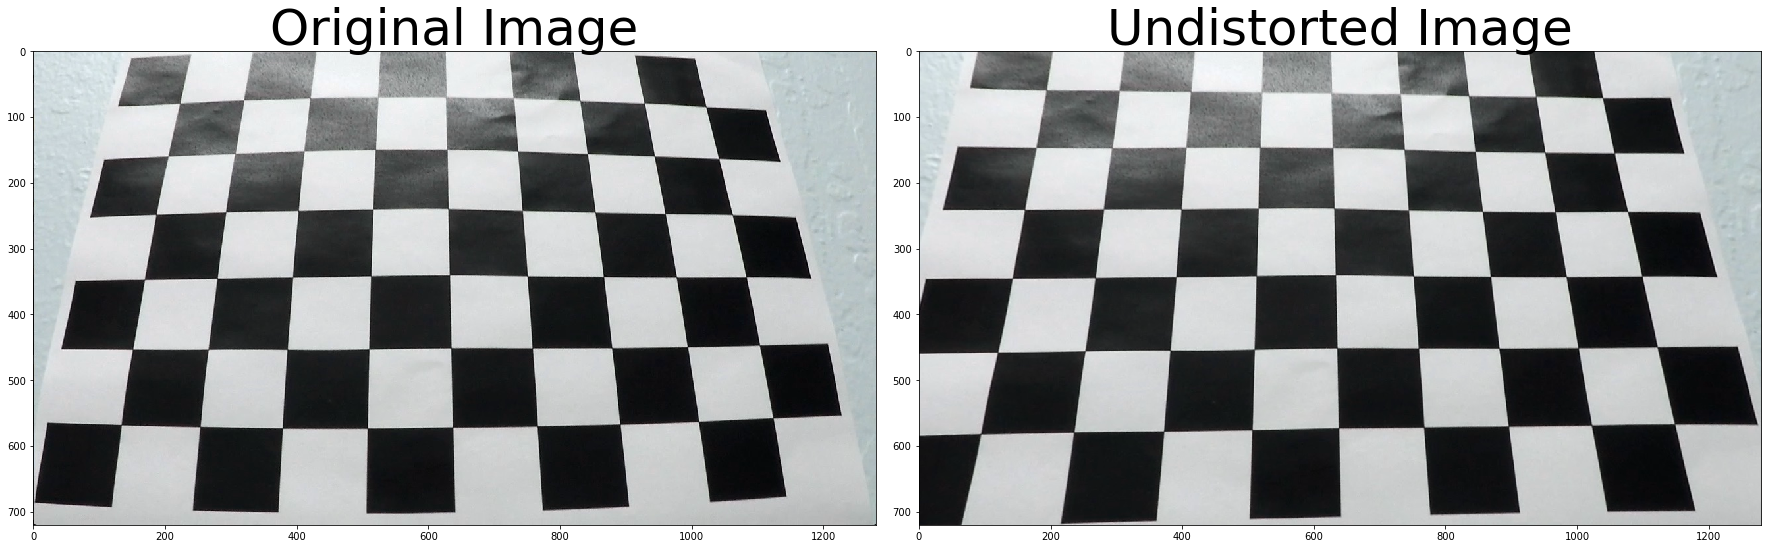

In [3]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
# print(img_size)

# Camera calibration with opject points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Output above seems close to expected result, I try it out to road image as well.

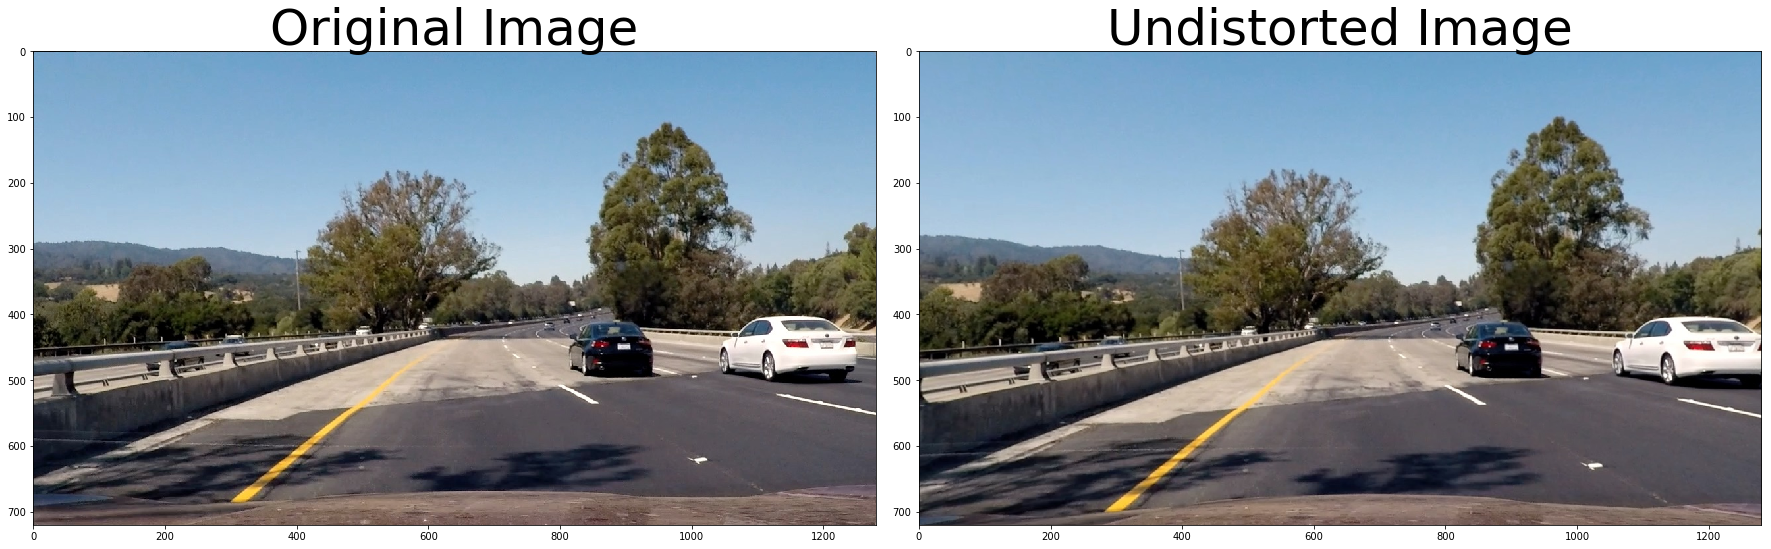

In [11]:
# Test undistortion on an image
img = cv2.imread('test_images/test4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])

# print(img_size)

# Camera calibration with opject points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [18]:
import os
# Helper function to camera calibrate and undistort image
def cal_undistort(img, objpoints=objpoints, imgpoints=imgpoints):
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1], img.shape[0]), None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    return dst

def save_image_from_func(file_list_path, func=None):
    for f_path in file_list_path:
        img = cv2.imread(f_path)
        if func is not None:
            img = func(img)
        
        res = cv2.resize(img, dsize=(250, 145))
        cv2.imwrite('output_images/' + os.path.basename(f_path), res)

### Distortion correction
I correct distortion using `cal_undistort` above, and save these output to `./output_images` folder.

In [19]:
calibration_images = glob.glob('./camera_cal/calibration*.jpg')
save_image_from_func(calibration_images, cal_undistort)

In [20]:
test_images = glob.glob('./test_images/**.jpg')
save_image_from_func(test_images, cal_undistort)

### Color/gradient threshold